In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv("../data/final_shelters_and_campsites.csv", index_col=0)
df.head()

,place_type,name,capacity,is_free,altitude,country,region,place,latitude,longitude,num_nearby_routes,num_services
0,0,Refugio FUENTE DEL PUERTO,NaN,0,1724.0,Spain,Aragon,Teruel,40.5081,-1.65051,4,NaN
1,1,Camping Yolimar,240.0,0,18.0,Spain,Asturias,Asturias,43.5527,-6.19617,4,NaN
2,0,Refugio HOYA DE LA MORA,NaN,0,2524.0,Spain,Andalusia,Granada,37.0941,-3.38409,8,NaN
3,0,Refugio MONSANT NATURA,32.0,0,534.0,Spain,Catalonia,Tarragona,41.2648,0.90469,25,NaN
4,1,Camping San Pedro,NaN,0,18.0,Spain,Galicia,A Coruña,43.3819,-8.28903,1,NaN


In [4]:
# Per aquest anàlisi treurem la columna name
df.drop(['name', 'place'], axis=1, inplace=True)

In [5]:
# Tornarem a comprovar que no hi hagi valors nuls
df.isna().sum()
df.isnull().sum()/len(df)*100

place_type            0.000000
capacity             44.836957
is_free               0.000000
altitude              0.815217
country               0.000000
region                0.000000
latitude              0.000000
longitude             0.000000
num_nearby_routes     0.000000
num_services         67.934783
dtype: float64

In [6]:
# Elimino valors nulls (temporal)
df = df.dropna()
df.isnull().sum()

place_type           0
capacity             0
is_free              0
altitude             0
country              0
region               0
latitude             0
longitude            0
num_nearby_routes    0
num_services         0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
place_type,414.0,0.028986,0.167969,0.0000,0.000000,0.000000,0.000000,1.00000
capacity,414.0,17.246377,25.784020,2.0000,6.000000,8.000000,16.000000,300.00000
is_free,414.0,0.830918,0.375278,0.0000,1.000000,1.000000,1.000000,1.00000
altitude,414.0,1604.002415,592.382343,1.0000,1271.250000,1697.000000,2000.000000,3250.00000
latitude,414.0,41.317487,2.076100,27.9613,40.362325,42.394600,42.624050,43.27980
longitude,414.0,-1.018252,2.906601,-17.8363,-2.908838,-0.445502,1.491827,3.05378
num_nearby_routes,414.0,22.983092,25.878973,0.0000,4.000000,14.000000,27.000000,93.00000
num_services,414.0,2.990338,1.750795,1.0000,2.000000,2.000000,4.000000,12.00000


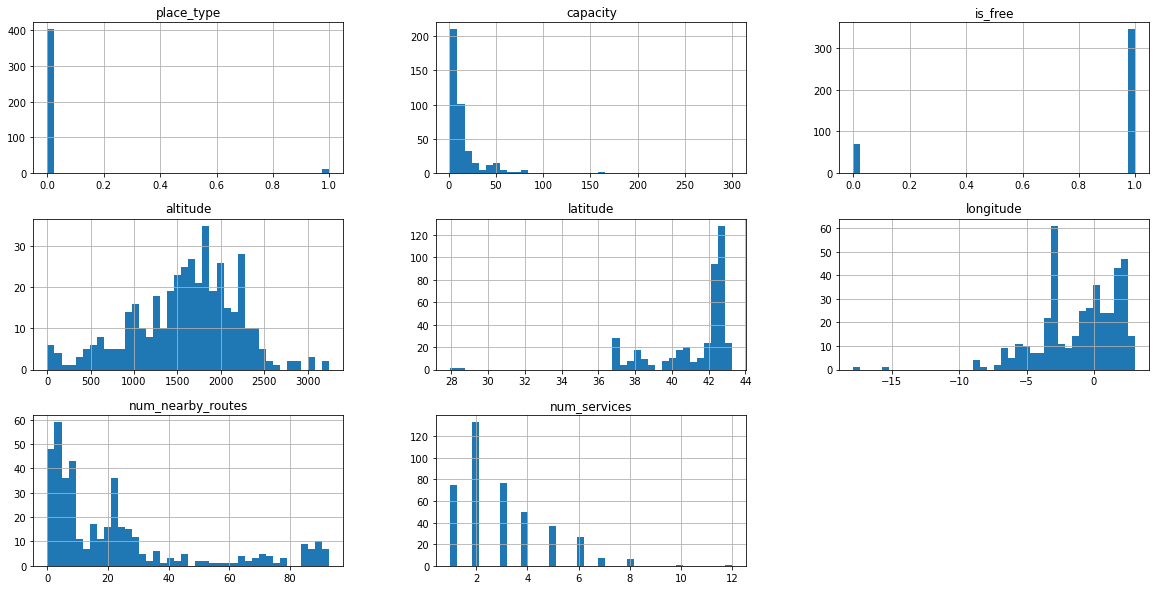

In [8]:
# Histogrames de les variables numèriques amb més de 4 valors
df.hist(bins=40, figsize=(20,10));

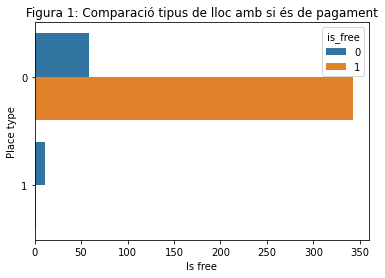

In [9]:
sns.countplot(y ='place_type', hue = "is_free", data = df) 
plt.xlabel('Is free')
plt.ylabel('Place type')
plt.title("Figura 1: Comparació tipus de lloc amb si és de pagament")
plt.show()

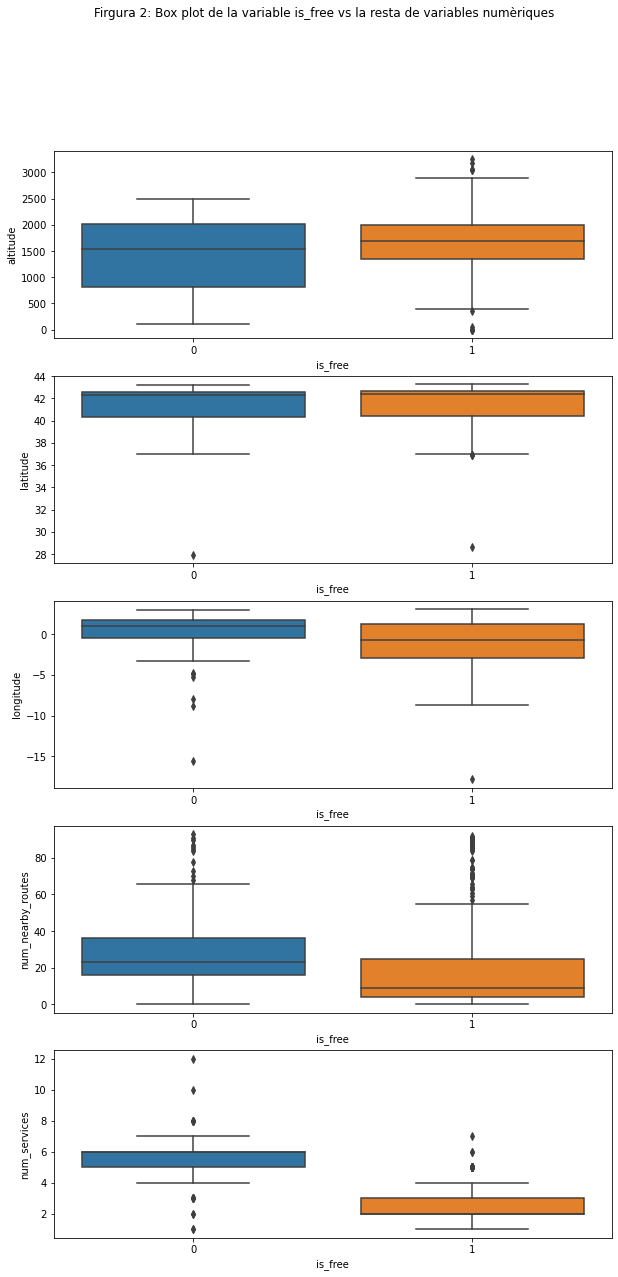

In [10]:
# Boxplot
columns = ['altitude', 'latitude', 'longitude', 'num_nearby_routes', 'num_services']

fig, axes = plt.subplots(5, 1, figsize= (10,20))

fig.suptitle('Firgura 2: Box plot de la variable is_free vs la resta de variables numèriques')
for i in range(len(columns)):
    sns.boxplot(ax=axes[i-1], data=df, x='is_free', y=df[columns[i-1]])

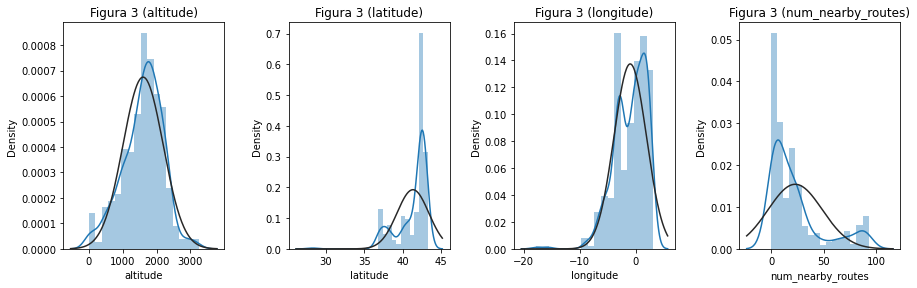

In [17]:
# Test de normalitat
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 5):
    ax = fig.add_subplot(2, 4, i)
    sns.distplot(df[columns[i-1]], fit = norm, ax=ax)
    plt.title(f"Figura 3 ({columns[i-1]})")

plt.show()

In [107]:
# Test de Levene (Homogeneitat)
import pingouin as pg

for col in columns:
    print(pg.homoscedasticity(df, dv='is_free', group=col, method='levene', alpha=0.05))

               W      pval  equal_var
levene  0.585729  0.995936       True
          W  pval  equal_var
levene  inf   0.0      False
          W  pval  equal_var
levene  inf   0.0      False
               W     pval  equal_var
levene  0.706634  0.95029       True
               W          pval  equal_var
levene  7.252219  7.552466e-08      False


In [100]:
# Coeficient d'assimetria
for col in columns [1:]:
    print(col + ": ", df[col].skew())

latitude:  -2.3750663995884524
longitude:  -1.5961149154511225
num_nearby_routes:  -0.4887423514845227
num_services:  -0.032072345645598674


In [62]:
# Transformació logarítmica per tenir unes variables amb unes formes més normals

for col in columns:
    df[col] = np.log1p(df[col])

Text(0.5, 0.98, 'Figura 4: Tranformació de variables')

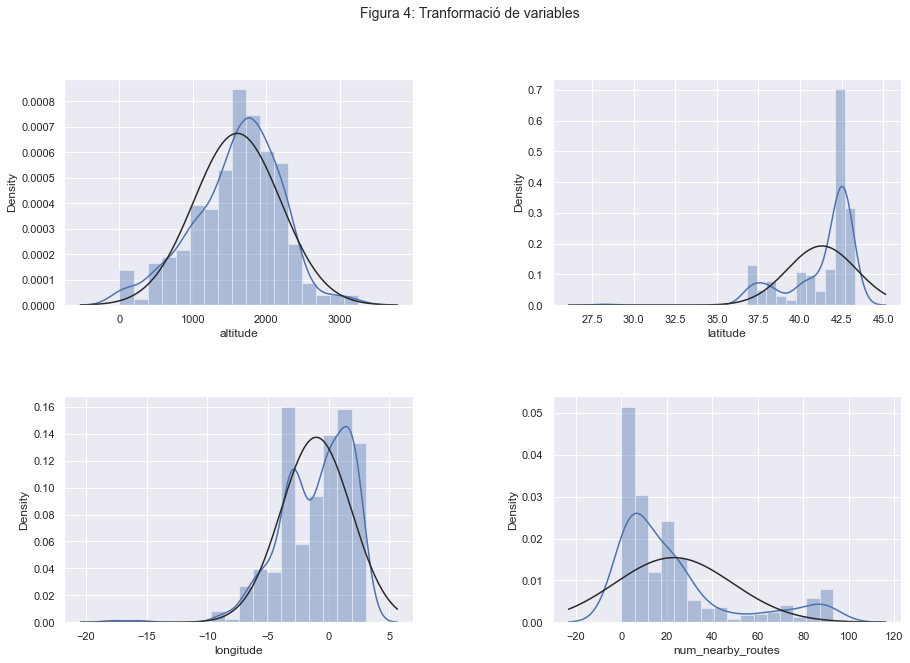

In [26]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 5):
    ax = fig.add_subplot(2, 2, i)
    sns.distplot(df[columns[i-1]], fit = norm, ax=ax)

fig.suptitle("Figura 4: Tranformació de variables", fontsize=14)

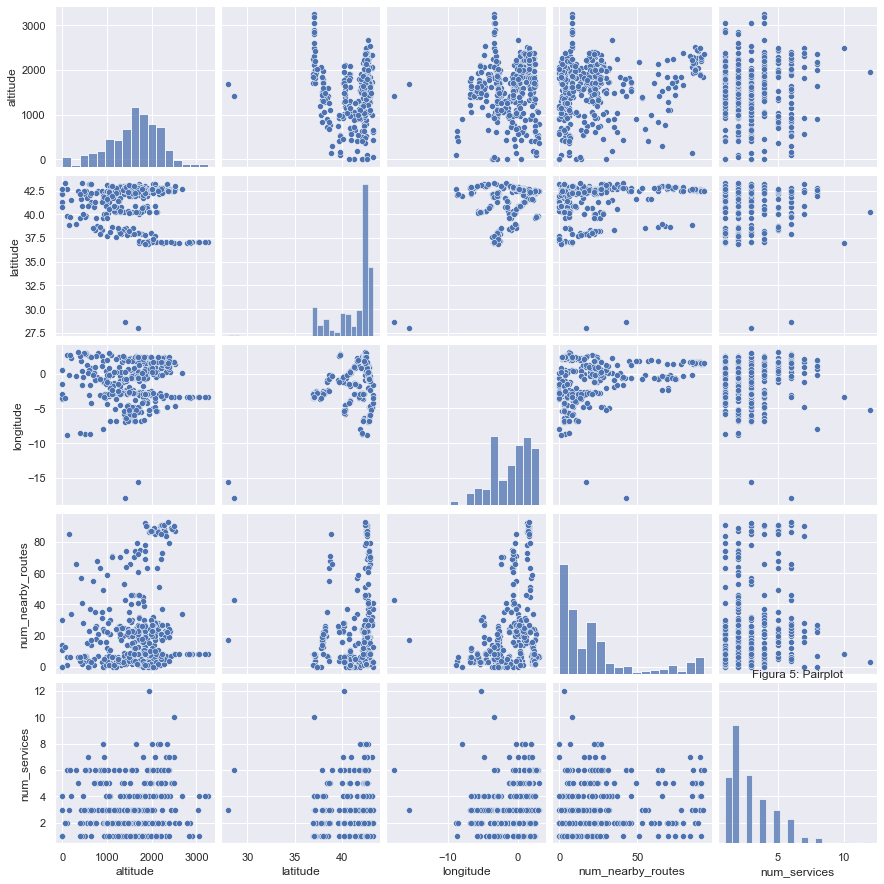

In [27]:
# Anàlisi bivariant
sns.set()
sns.pairplot(df[columns], size = 2.5)
plt.title('Figura 5: Pairplot')
plt.show()

Text(0.5, 0.98, 'Figura 6: Anàlisi multivariant')

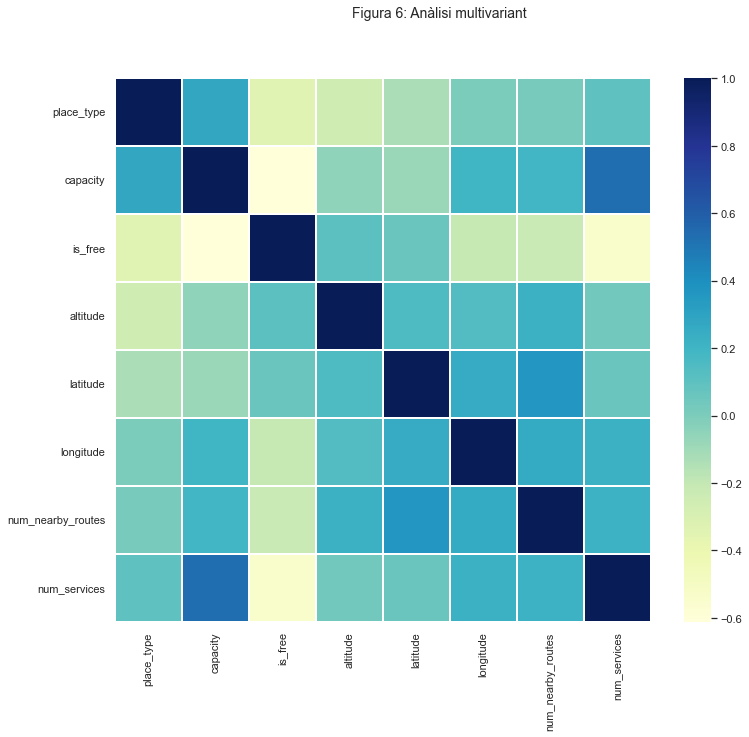

In [30]:
#Anàlisi multivariant
corrmat = df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)
fig.suptitle("Figura 6: Anàlisi multivariant", fontsize=14)

In [99]:
#Coeficient de correlació
from scipy.stats import pearsonr

columns_pearson = 'place_type', 'capacity', 'altitude', 'country', 'region', 'num_nearby_routes', 'num_services'
for col in columns_pearson:
    corr, _ = pearsonr(df['is_free'], df[col])
    print("Correlation {0}: {1}".format(col, corr))
    #print('Pearsons correlation: %.3f' % corr)

Correlation place_type: -0.3172719492644257
Correlation capacity: -0.6423854462190832
Correlation altitude: 0.22422164629074992
Correlation country: 0.21759487806798766
Correlation region: 0.08172386321956596
Correlation num_nearby_routes: -0.12710047027323754
Correlation num_services: -0.6204707619795895


In [67]:
#Covariance
from numpy import cov
for col in columns: 
    covariance = cov(df['is_free'], df[col])
    print("Covariance {0}: {1}".format(col, covariance))

Covariance altitude: [[0.14083354 0.03173141]
 [0.03173141 0.76375866]]
Covariance latitude: [[0.14083354 0.000259  ]
 [0.000259   0.00271436]]
Covariance longitude: [[0.14083354        nan]
 [       nan        nan]]
Covariance num_nearby_routes: [[ 0.14083354 -0.08860239]
 [-0.08860239  1.32289387]]
Covariance num_services: [[ 0.14083354 -0.08844274]
 [-0.08844274  0.17063253]]


In [69]:
# Discretització de variables categòriques
# Country: Spain 0, France 1, Andorra 2
df['country'].replace(['Spain','France', 'Andorra'],[0,1,2],inplace=True)
df.head()

,place_type,capacity,is_free,altitude,country,region,latitude,longitude,num_nearby_routes,num_services
7,0,5.0,1,7.241366,0,Castile and león,3.769009,NaN,1.791759,1.098612
12,0,5.0,1,7.234177,0,Castile and león,3.782959,NaN,2.302585,1.098612
15,0,18.0,1,7.831220,0,Catalonia,3.775000,0.887562,4.477337,1.098612
22,0,4.0,1,7.260523,0,Castile-la mancha,3.677110,NaN,1.945910,0.693147
24,0,6.0,1,7.337588,0,Castile and león,3.759457,NaN,1.609438,0.693147


In [70]:
df['region'].replace([' Aragon', ' Asturias', ' Andalusia', ' Catalonia', ' Galicia',
 ' Castile-la mancha', ' Castile and león', ' La rioja',
 ' Valencian community', ' Navarre', ' Community of madrid',
 ' Balearic islands', ' Occitanie', ' Encamp', ' Region of murcia',
 ' Cantabria', ' Basque country', ' Ordino', ' La massana', ' Canary islands',
 ' Canillo', ' Extremadura', ' Escaldes-engordany', ' Nouvelle-aquitaine',
 ' Sant julià de lòria'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],inplace=True)
df.head()

,place_type,capacity,is_free,altitude,country,region,latitude,longitude,num_nearby_routes,num_services
7,0,5.0,1,7.241366,0,6,3.769009,NaN,1.791759,1.098612
12,0,5.0,1,7.234177,0,6,3.782959,NaN,2.302585,1.098612
15,0,18.0,1,7.831220,0,3,3.775000,0.887562,4.477337,1.098612
22,0,4.0,1,7.260523,0,5,3.677110,NaN,1.945910,0.693147
24,0,6.0,1,7.337588,0,6,3.759457,NaN,1.609438,0.693147


In [84]:
# Estandarització de les dades
from sklearn.preprocessing import StandardScaler
#std_df = df[['capacity',  'altitude','latitude', 'longitude', 'num_nearby_routes', 'num_services']]
std_df = df.drop('is_free', 1)

scaler = StandardScaler()
std_df[std_df.columns] = scaler.fit_transform(std_df[std_df.columns])
std_df.head()

,place_type,capacity,altitude,country,region,latitude,longitude,num_nearby_routes,num_services
15,-0.187317,-0.105808,0.819698,-0.604976,-0.511719,0.449391,0.486663,1.312574,-0.681262
31,-0.187317,-0.503218,0.575563,-0.604976,-0.511719,0.235538,0.800555,-0.478583,-0.681262
35,-0.187317,-0.635688,0.510920,0.837189,0.901664,0.307870,0.791438,-1.724835,-1.648130
36,-0.187317,-0.503218,0.637543,2.279353,1.058707,0.363459,0.570598,1.342710,0.536847
39,5.338539,4.596883,-1.331723,-0.604976,-0.511719,0.004767,0.931718,0.144543,1.339196


In [102]:
# Serializing data frame
std_df['is_free'] = df['is_free']

df.to_pickle('../data/standard_df.pkl')